In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data from mini-data.txt and data2.txt
data = np.loadtxt('mini-data.txt')

# Initialize x, y from mini-data.txt
x_data = data[:, :2]
y_data = data[:, 2].astype(dtype=int)

## quick look at mini-data.txt
fig, ax = plt.subplots(1,1,figsize=(6,6))
fig.suptitle('Sneak Peak at mini-data.txt')

sns.scatterplot(x=x_data[:,0],y=x_data[:,1],hue=y_data,ax=ax)

x_min, x_max = x_data[:,0].min(), x_data[:,0].max()
y_min, y_max = x_data[:,1].min(), x_data[:,1].max()
x_buffer = (x_max - x_min) * 0.1 
y_buffer = (y_max - y_min) * 0.1

ax.set_xlim(x_min - x_buffer, x_max + x_buffer)
ax.set_ylim(y_min - y_buffer, y_max + y_buffer)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

legend = ax.legend(bbox_to_anchor=(0.65, 1.09), ncol=2,frameon=False)

plt.show()

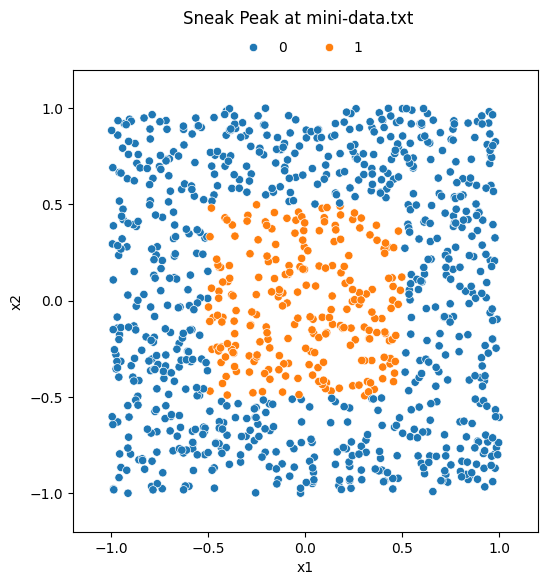

In [31]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
fig.suptitle('Sneak Peak at mini-data.txt')

sns.scatterplot(x=x_data[:,0],y=x_data[:,1],hue=y_data,ax=ax)

x_min, x_max = x_data[:,0].min(), x_data[:,0].max()
y_min, y_max = x_data[:,1].min(), x_data[:,1].max()
x_buffer = (x_max - x_min) * 0.1 
y_buffer = (y_max - y_min) * 0.1

ax.set_xlim(x_min - x_buffer, x_max + x_buffer)
ax.set_ylim(y_min - y_buffer, y_max + y_buffer)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

legend = ax.legend(bbox_to_anchor=(0.65, 1.09), ncol=2,frameon=False)

plt.show()

Using scikit-learn version: 1.6.1
--- Part (a): Initial Data Plot ---


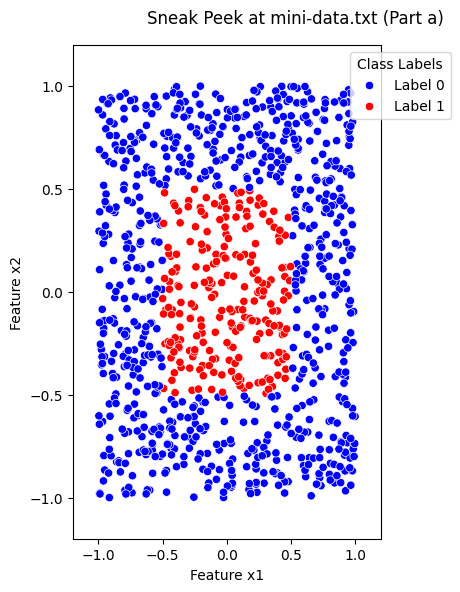

Plot for Part (a) displayed.

--- Part (b): Fitting a Decision Tree ---
Decision Tree fitted. Stopping criterion used: max_depth = 3.
Training accuracy of the decision tree: 0.8820

--- Part (c): Displaying the Decision Tree ---


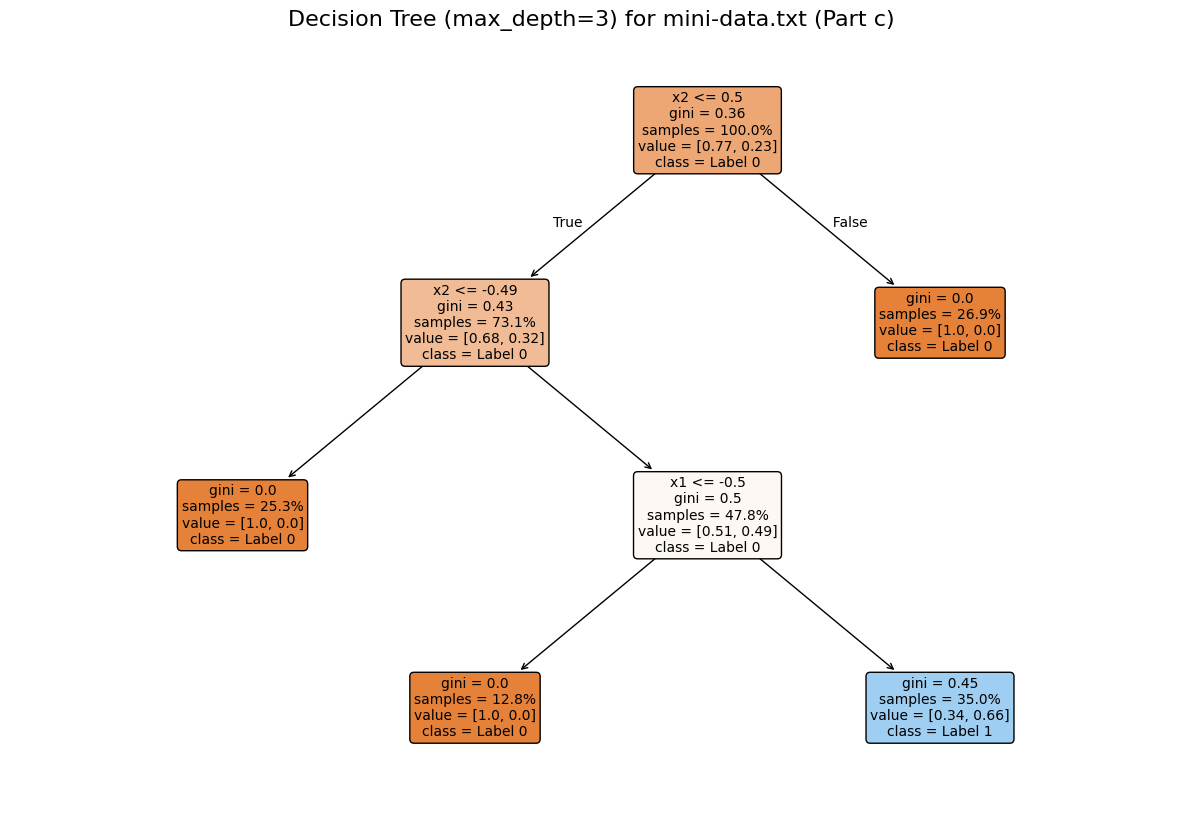

Plot for Part (c) displayed.

--- Part (d): Fitting Boosted Decision Stumps ---
NOTE: Using algorithm='SAMME' for AdaBoostClassifier due to environment constraints.
AdaBoostClassifier fitted with 5 decision stumps using 'SAMME' algorithm.

Displaying each individual stump used by AdaBoost (Part d):


/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


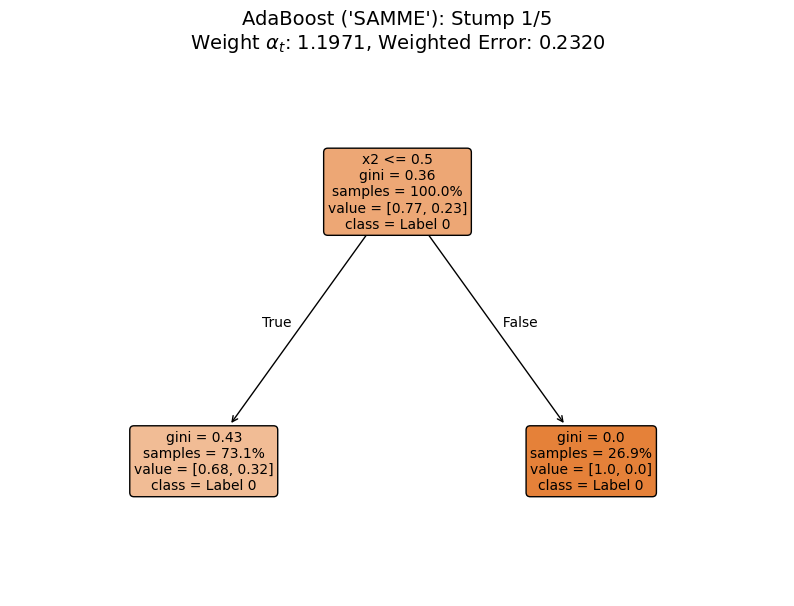

Plot for Stump 1 displayed. Stump Weight (alpha): 1.1971, Stump Weighted Error: 0.2320


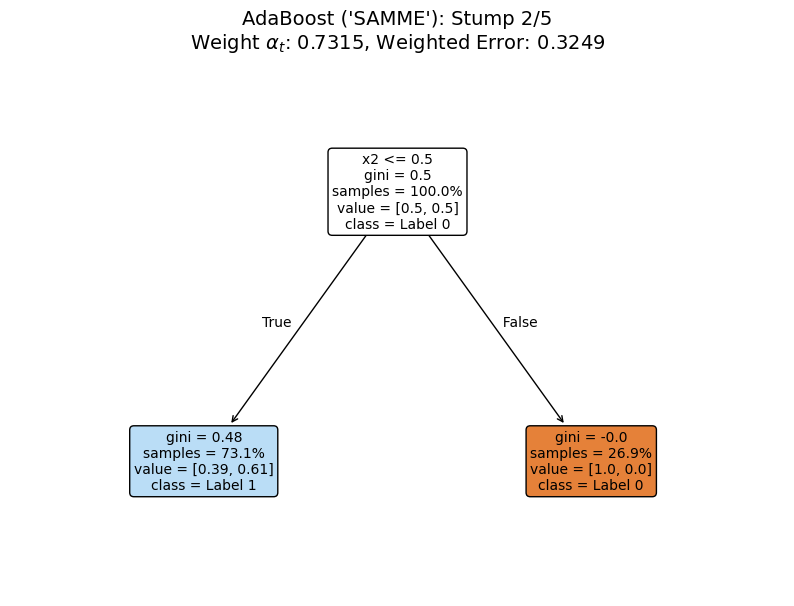

Plot for Stump 2 displayed. Stump Weight (alpha): 0.7315, Stump Weighted Error: 0.3249


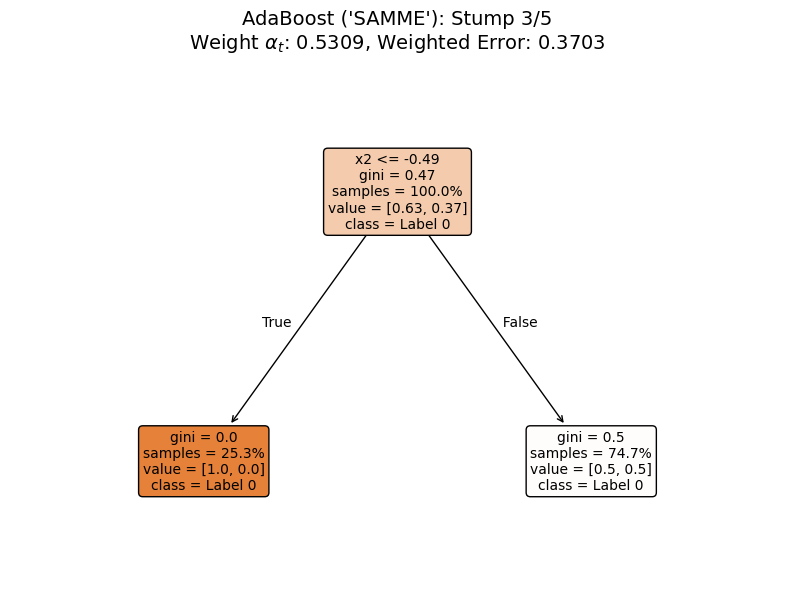

Plot for Stump 3 displayed. Stump Weight (alpha): 0.5309, Stump Weighted Error: 0.3703


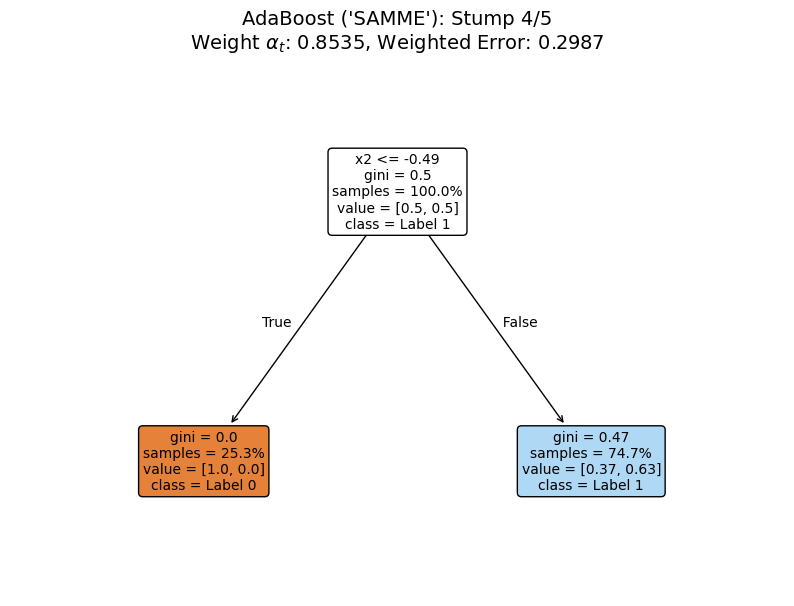

Plot for Stump 4 displayed. Stump Weight (alpha): 0.8535, Stump Weighted Error: 0.2987


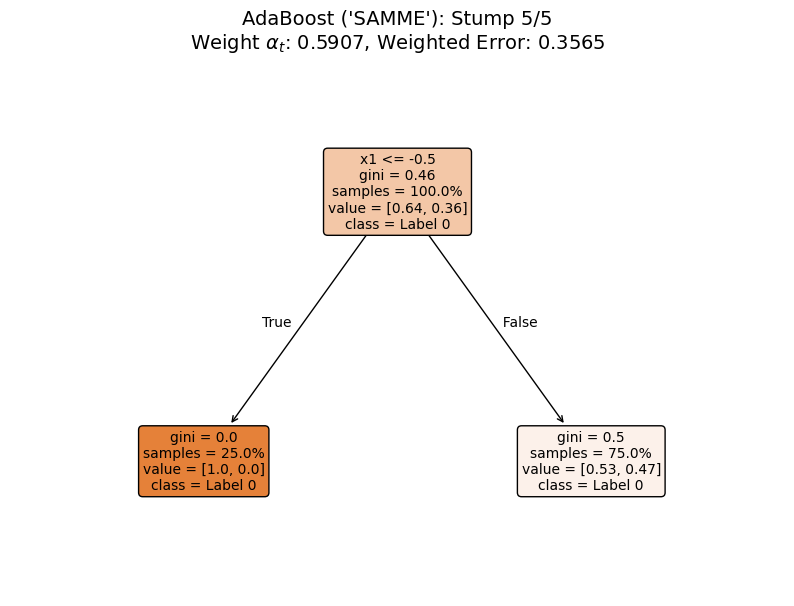

Plot for Stump 5 displayed. Stump Weight (alpha): 0.5907, Stump Weighted Error: 0.3565

All stumps for Part (d) displayed.

--- Part (e): Training Accuracy as Stumps are Added (AdaBoost with 'SAMME') ---
Number of Stumps | Training Accuracy | Estimator Weight (Alpha) | Estimator Error (Weighted)
-----------------|-------------------|--------------------------|---------------------------
               1 |            0.7680 |                   1.1971 |                    0.2320
               2 |            0.7680 |                   0.7315 |                    0.3249
  (Accuracy effectively unchanged from 1 stumps to 2 stumps.)
               3 |            0.7680 |                   0.5309 |                    0.3703
  (Accuracy effectively unchanged from 2 stumps to 3 stumps.)
               4 |            0.7680 |                   0.8535 |                    0.2987
  (Accuracy effectively unchanged from 3 stumps to 4 stumps.)
               5 |            0.7680 |                  

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import sklearn # For version checking

print(f"Using scikit-learn version: {sklearn.__version__}")

# --- Part (a): Load and Plot Data (from user's context) ---
# Ensure 'mini-data.txt' is in the same directory as this script
try:
    data = np.loadtxt('mini-data.txt')
except FileNotFoundError:
    print("Error: 'mini-data.txt' not found. Please ensure it's in the correct directory.")
    exit()
except Exception as e:
    print(f"Error loading 'mini-data.txt': {e}")
    exit()

x_data = data[:, :2]
y_data = data[:, 2].astype(dtype=int)

print("--- Part (a): Initial Data Plot ---")
fig, ax = plt.subplots(1,1,figsize=(6,6))
fig.suptitle('Sneak Peek at mini-data.txt (Part a)')
sns.scatterplot(x=x_data[:,0], y=x_data[:,1], hue=y_data, ax=ax, palette={0: 'blue', 1: 'red'})

x_min, x_max = x_data[:,0].min(), x_data[:,0].max()
y_min, y_max = x_data[:,1].min(), x_data[:,1].max()
x_buffer = (x_max - x_min) * 0.1 
y_buffer = (y_max - y_min) * 0.1

ax.set_xlim(x_min - x_buffer, x_max + x_buffer)
ax.set_ylim(y_min - y_buffer, y_max + y_buffer)
ax.set_xlabel('Feature x1')
ax.set_ylabel('Feature x2')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Label 0', 'Label 1'], title="Class Labels", loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()
print("Plot for Part (a) displayed.\n")

# --- Part (b): Fit a Decision Tree ---
print("--- Part (b): Fitting a Decision Tree ---")
dt_max_depth = 3
dt_random_state = 42 

decision_tree = DecisionTreeClassifier(max_depth=dt_max_depth, random_state=dt_random_state)
decision_tree.fit(x_data, y_data)

print(f"Decision Tree fitted. Stopping criterion used: max_depth = {dt_max_depth}.")
train_accuracy_dt = decision_tree.score(x_data, y_data)
print(f"Training accuracy of the decision tree: {train_accuracy_dt:.4f}\n")

# --- Part (c): Display the Tree ---
print("--- Part (c): Displaying the Decision Tree ---")
plt.figure(figsize=(15, 10)) 
plot_tree(decision_tree, 
          filled=True, 
          feature_names=['x1', 'x2'], 
          class_names=['Label 0', 'Label 1'],
          rounded=True,
          fontsize=10,
          proportion=True, 
          precision=2)     
plt.title(f"Decision Tree (max_depth={dt_max_depth}) for mini-data.txt (Part c)", fontsize=16)
plt.show()
print("Plot for Part (c) displayed.\n")

# --- Part (d): Fit Boosted Decision Stumps & Display Each Stump ---
print("--- Part (d): Fitting Boosted Decision Stumps ---")
ada_n_estimators = 5
ada_classifier_random_state = 42 
stump_random_state = 100 
stump_max_depth = 1 
ada_learning_rate = 1.0 

stump_estimator = DecisionTreeClassifier(max_depth=stump_max_depth, random_state=stump_random_state)

# MODIFIED: Using algorithm='SAMME' as per user's environment constraint
print("NOTE: Using algorithm='SAMME' for AdaBoostClassifier due to environment constraints.")
ada_boost = AdaBoostClassifier(
    estimator=stump_estimator,
    n_estimators=ada_n_estimators,
    learning_rate=ada_learning_rate,
    algorithm='SAMME',  # Changed from 'SAMME.R'
    random_state=ada_classifier_random_state
)

ada_boost.fit(x_data, y_data)
print(f"AdaBoostClassifier fitted with {ada_n_estimators} decision stumps using 'SAMME' algorithm.")

print("\nDisplaying each individual stump used by AdaBoost (Part d):")
for i, stump in enumerate(ada_boost.estimators_):
    plt.figure(figsize=(10, 7)) 
    plot_tree(stump, 
              filled=True, 
              feature_names=['x1', 'x2'], 
              class_names=['Label 0', 'Label 1'],
              rounded=True,
              fontsize=10,
              proportion=True,
              precision=2)
    
    stump_weight = ada_boost.estimator_weights_[i]
    stump_error = ada_boost.estimator_errors_[i] 
    
    plt.title(f"AdaBoost ('SAMME'): Stump {i+1}/{ada_n_estimators}\nWeight $\\alpha_t$: {stump_weight:.4f}, Weighted Error: {stump_error:.4f}", fontsize=14)
    plt.show()
    print(f"Plot for Stump {i+1} displayed. Stump Weight (alpha): {stump_weight:.4f}, Stump Weighted Error: {stump_error:.4f}")
print("\nAll stumps for Part (d) displayed.\n")

# --- Part (e): Table of Training Accuracy for AdaBoost ---
print("--- Part (e): Training Accuracy as Stumps are Added (AdaBoost with 'SAMME') ---")
print("Number of Stumps | Training Accuracy | Estimator Weight (Alpha) | Estimator Error (Weighted)")
print("-----------------|-------------------|--------------------------|---------------------------")

previous_accuracy = 0.0
accuracies = list(ada_boost.staged_score(x_data, y_data))

for i in range(ada_n_estimators):
    current_accuracy = accuracies[i]
    estimator_weight = ada_boost.estimator_weights_[i]
    estimator_error = ada_boost.estimator_errors_[i]
    
    print(f"{i + 1:16} | {current_accuracy:17.4f} | {estimator_weight:24.4f} | {estimator_error:25.4f}")
    
    if i > 0 and abs(current_accuracy - previous_accuracy) < 1e-9: # Check for effectively no change
        print(f"  (Accuracy effectively unchanged from {i} stumps to {i+1} stumps.)")
    previous_accuracy = current_accuracy

final_ada_accuracy = ada_boost.score(x_data, y_data)
print(f"\nFinal training accuracy of AdaBoost with {ada_n_estimators} stumps: {final_ada_accuracy:.4f}")

print("\n--- Diagnostic Info for AdaBoost ('SAMME') ---")
print(f"Estimator weights (alphas): {np.round(ada_boost.estimator_weights_, 4)}")
print(f"Estimator errors (weighted): {np.round(ada_boost.estimator_errors_, 4)}")

if len(set(np.round(accuracies, 7))) == 1 and ada_n_estimators > 1: # Round for float comparison
    print("\nNote: The training accuracy remained constant across all stages of AdaBoost.")
    print("This might be due to the nature of the 'mini-data.txt' (e.g., small size, specific structure)")
    print("where initial stumps achieve a certain accuracy, and subsequent stumps, while potentially")
    print("having non-zero weights, do not change the overall classification outcome for enough samples")
    print("to alter the accuracy score within this number of estimators, especially with the 'SAMME' algorithm.")

print("\nAll parts of Question 7 addressed.")

# Step-by-Step Solution: Credit Card Fraud Detection Analysis (Question 8)

This document outlines the solution to Question 8, focusing on analyzing a credit card fraud dataset, handling class imbalance, and evaluating various classifiers.

## 0. Prerequisites

*   **Dataset:** Download `creditcard.csv` from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud).
*   **Libraries:** Ensure you have Python installed with `pandas`, `numpy`, `scikit-learn`, `matplotlib`, and `seaborn`.

## 1. Part (a): Understanding Class Imbalance

**Task:** How many of the transactions are fraudulent? Why might this be problematic when learning a classifier?

**Approach:**
1.  Load the dataset using `pandas`.
2.  Count the occurrences of each class in the 'Class' column (0 for legitimate, 1 for fraudulent).
3.  Discuss the implications of the observed class distribution.

**Code Snippet (Conceptual from Python script):**
```python
# df is the loaded DataFrame
class_counts = df['Class'].value_counts()
fraudulent_count = class_counts.get(1, 0)
legitimate_count = class_counts.get(0, 0)
total_count = len(df)

print(f"Fraudulent transactions: {fraudulent_count} ({fraudulent_count/total_count*100:.2f}%)")
print(f"Legitimate transactions: {legitimate_count} ({legitimate_count/total_count*100:.2f}%)")
```

**Why Class Imbalance is Problematic:**
The credit card fraud dataset is highly imbalanced, with fraudulent transactions being a very small minority. This poses several challenges:
*   **Bias Towards Majority Class:** Standard machine learning algorithms aim to minimize overall error. With imbalanced data, a model can achieve high accuracy by simply always predicting the majority class (legitimate transactions). This makes the model useless for detecting fraud.
*   **Poor Minority Class Performance:** The model might learn the characteristics of the majority class very well but fail to capture the patterns specific to the minority class (fraud). This results in low recall for fraudulent transactions.
*   **Misleading Evaluation Metrics:** Accuracy becomes a deceptive metric. A model predicting "legitimate" for all transactions might have >99% accuracy but 0% fraud detection rate. More suitable metrics include:
    *   **Precision:** Of all transactions predicted as fraud, how many actually were? (TP / (TP + FP))
    *   **Recall (Sensitivity):** Of all actual fraudulent transactions, how many did the model correctly identify? (TP / (TP + FN)) - This is often critical for fraud detection.
    *   **F1-Score:** The harmonic mean of precision and recall.
    *   **Area Under the Precision-Recall Curve (AUC-PR):** A good summary metric for imbalanced datasets.
    *   **Confusion Matrix:** Provides a detailed breakdown of correct and incorrect classifications for each class.

## 2. Part (b): Downsampling for Balance

**Task:** Downsample the legitimate transactions to make the data set more balanced. For instance, you might try to make sure that each class (legitimate or fraudulent) makes up at least 25% of the data set.

**Approach:**
1.  Separate the dataset into majority (Class 0 - legitimate) and minority (Class 1 - fraudulent) samples.
2.  Determine the target number of majority samples for the downsampled dataset. If the minority class (fraud) has $N_1$ samples, and we want it to be at least 25% of the new dataset, the majority class (legitimate) should have at most $3 \times N_1$ samples.
    *   Let $N_{0,new}$ be the new number of legitimate samples.
    *   We want $N_1 / (N_1 + N_{0,new}) \ge 0.25$.
    *   This implies $4N_1 \ge N_1 + N_{0,new}$, so $3N_1 \ge N_{0,new}$.
3.  Randomly select $N_{0,new} = \min(\text{current } N_0, 3N_1)$ samples from the legitimate transactions without replacement.
4.  Combine these downsampled legitimate transactions with all the original fraudulent transactions to create the new, more balanced dataset.

**Code Snippet (Conceptual from Python script):**
```python
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]
minority_count = len(df_minority)

# Target N_majority_new <= minority_count * 3
n_majority_new = int(minority_count * (1 / 0.25 - 1)) # 0.25 is MINORITY_CLASS_MIN_PERCENTAGE
n_majority_new = min(n_majority_new, len(df_majority))

df_majority_downsampled = resample(df_majority, 
                                   replace=False, 
                                   n_samples=n_majority_new,
                                   random_state=RANDOM_STATE)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
```
This strategy ensures that the fraudulent class will constitute at least 25% of the new dataset, making it more balanced for training classifiers.

## 3. Part (c): Fitting and Evaluating Classifiers

**Task:** Fit three kinds of classifier (Decision Tree, Boosted Decision Stumps, Random Forest) to the *downsampled* data. Use cross-validation to estimate the confusion matrix.

**Overall Approach for Part (c):**
1.  **Preprocessing:**
    *   The 'Time' column is often dropped as its raw value might not be directly useful without complex feature engineering (e.g., converting to cyclical features like hour of day).
    *   The 'Amount' column has a wide range and should be scaled (e.g., using `StandardScaler`) to prevent features with larger magnitudes from dominating distance-based or gradient-based algorithms. The V1-V28 features are PCA components and are typically already scaled.
2.  **Classifier Setup:** Define the three classifiers with chosen hyperparameters.
3.  **Cross-Validation:** Use `sklearn.model_selection.cross_val_predict` with `StratifiedKFold` (e.g., 5 folds). This method provides predictions for each data point when it was in the test set of a fold, giving an out-of-sample prediction set.
4.  **Confusion Matrix:** For each classifier, use the true labels and the cross-validated predictions to compute the confusion matrix using `sklearn.metrics.confusion_matrix`.
5.  **Display:** Visualize the confusion matrix using `sklearn.metrics.ConfusionMatrixDisplay`.

### 3.1 Preprocessing

**Code Snippet (Conceptual from Python script):**
```python
# df_downsampled is the output from Part (b)
df_processed = df_downsampled.copy()
if 'Time' in df_processed.columns:
    df_processed = df_processed.drop('Time', axis=1)
scaler = StandardScaler()
if 'Amount' in df_processed.columns:
    df_processed['Amount'] = scaler.fit_transform(df_processed['Amount'].values.reshape(-1, 1))

X = df_processed.drop('Class', axis=1)
y = df_processed['Class']
```

### 3.2 Classifier Training and Evaluation Loop

**General Loop Structure:**
```python
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define classifiers (see specific hyperparameters below)
classifiers = { ... } 
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

for name, clf in classifiers.items():
    y_pred_cv = cross_val_predict(clf, X, y, cv=cv_strategy)
    cm = confusion_matrix(y, y_pred_cv)
    
    print(f"Confusion Matrix for {name}:")
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]) # Assuming 0: Legit, 1: Fraud
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {name} (Cross-Validated)")
    plt.show()
    
    # Further interpretation (TP, FP, FN, TN, Precision, Recall)
    # ...
```

### 3.3 Specific Classifiers and Hyperparameters

**Rationale for Hyperparameter Choices:**
The chosen hyperparameters are starting points. For a real-world application, hyperparameter tuning (e.g., using `GridSearchCV` or `RandomizedSearchCV`) would be essential. `random_state` is set for reproducibility.

1.  **Decision Tree**
    *   **Classifier:** `sklearn.tree.DecisionTreeClassifier`
    *   **Hyperparameters (Example):**
        *   `max_depth=5`: Limits the depth of the tree to prevent overfitting on this smaller, downsampled dataset. A deeper tree might capture too much noise.
        *   `random_state=RANDOM_STATE`
    *   **Focus:** Decision trees are interpretable and can capture non-linear relationships.

2.  **Boosted Decision Stumps (AdaBoost)**
    *   **Classifier:** `sklearn.ensemble.AdaBoostClassifier`
    *   **Hyperparameters (Example):**
        *   `estimator=DecisionTreeClassifier(max_depth=1, random_state=RANDOM_STATE)`: This makes the base learners decision stumps (trees with only one split).
        *   `n_estimators=50`: The number of stumps to build. 50 is a moderate starting point.
        *   `learning_rate=1.0`: Default. Controls the contribution of each stump.
        *   `random_state=RANDOM_STATE`
    *   **Focus:** AdaBoost focuses on misclassified samples from previous iterations, building a strong classifier from weak learners.

3.  **Random Forest**
    *   **Classifier:** `sklearn.ensemble.RandomForestClassifier`
    *   **Hyperparameters (Example):**
        *   `n_estimators=100`: Number of trees in the forest. 100 is a common default.
        *   `max_depth=10`: Limits the depth of individual trees. Random Forests can handle deeper trees better than single decision trees due to averaging, but some restriction can still help with generalization on smaller datasets.
        *   `random_state=RANDOM_STATE`
        *   `n_jobs=-1`: Uses all available CPU cores for training, speeding up the process.
    *   **Focus:** Random Forests reduce variance by building multiple trees on different subsets of data and features, then averaging their predictions (or taking a majority vote).

### 3.4 Interpreting the Confusion Matrix

A confusion matrix for a binary classification problem (Legitimate vs. Fraudulent) looks like this:

|                   | Predicted Legitimate (0) | Predicted Fraudulent (1) |
| :---------------- | :----------------------- | :------------------------- |
| **Actual Legitimate (0)** | True Negatives (TN)      | False Positives (FP)     |
| **Actual Fraudulent (1)** | False Negatives (FN)     | True Positives (TP)      |

*   **True Negatives (TN):** Legitimate transactions correctly classified as legitimate.
*   **False Positives (FP):** Legitimate transactions incorrectly classified as fraudulent (Type I Error). This can cause inconvenience to legitimate customers.
*   **False Negatives (FN):** Fraudulent transactions incorrectly classified as legitimate (Type II Error). This is often the most critical error in fraud detection, as it means fraud goes undetected.
*   **True Positives (TP):** Fraudulent transactions correctly classified as fraudulent.

**Key Metrics from the Confusion Matrix for Fraud Detection:**
*   **Recall (Sensitivity) for Fraud = TP / (TP + FN):** Ability to find all actual fraudulent transactions. High recall is crucial.
*   **Precision for Fraud = TP / (TP + FP):** Accuracy of positive predictions; when the model predicts fraud, how often is it correct?
*   **Specificity for Legitimate = TN / (TN + FP):** Ability to find all actual legitimate transactions.

The goal is typically to maximize True Positives (detecting fraud) while minimizing False Negatives (missing fraud). There's often a trade-off with False Positives (flagging legitimate transactions as fraud).

## 4. Conclusion

This exercise demonstrates a pipeline for handling a common real-world problem: classification with imbalanced data. Key steps include understanding the data imbalance, applying a resampling technique (downsampling), preprocessing features, and then training and evaluating multiple types of classifiers using robust methods like cross-validation and detailed metrics like the confusion matrix. The choice of the "best" model would depend on the specific business requirements, particularly the relative costs of false negatives versus false positives.
depend on the specific business requirements, particularly the relative costs of false negatives versus false positives.


Data loaded successfully from creditcard.csv
Dataset shape: (284807, 31)

--- Part (a): Class Imbalance Analysis ---
Total transactions: 284807
Legitimate transactions (Class 0): 284315 (99.83%)
Fraudulent transactions (Class 1): 492 (0.17%)

Why class imbalance is problematic for classifiers:
1. Bias towards majority class: Models may achieve high accuracy by simply predicting the majority class, failing to detect the minority class (fraud).
2. Poor minority class performance: Standard algorithms aim to minimize overall error, which is dominated by the majority class. This leads to poor recall for the minority class.
3. Misleading evaluation metrics: Accuracy becomes a poor measure. Metrics like Precision, Recall, F1-score, and AUC-PR are more informative for imbalanced datasets.

--- Part (b): Downsampling Legitimate Transactions ---
Original minority (fraudulent) samples: 492
Original majority (legitimate) samples: 284315
Targeting new majority samples to be at most 1476 (to make mi

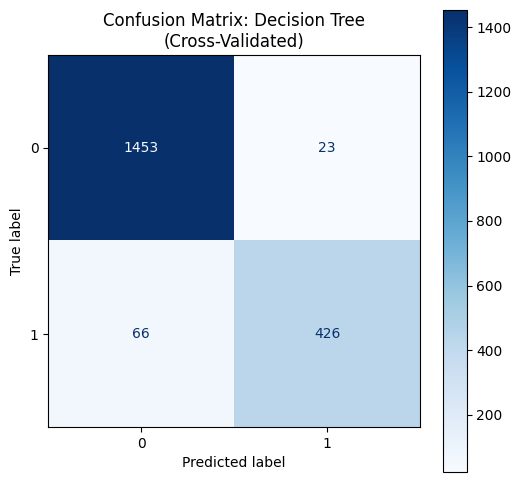

True Negatives (Legit correctly ID'd): 1453
False Positives (Legit mis-ID'd as Fraud): 23 <- Type I error
False Negatives (Fraud mis-ID'd as Legit): 66 <- Type II error (Critical for fraud!)
True Positives (Fraud correctly ID'd): 426
Recall for Fraud (Class 1): 0.8659
Precision for Fraud (Class 1): 0.9488

Evaluating: Boosted Decision Stumps (AdaBoost)
Hyperparameters: {'algorithm': 'deprecated', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 1, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__random_state': 42, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_depth=1, random_state=42), 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 42}
Confusion Matrix for Boosted Dec

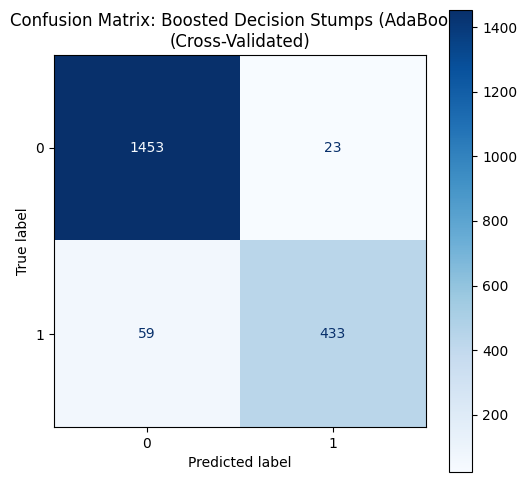

True Negatives (Legit correctly ID'd): 1453
False Positives (Legit mis-ID'd as Fraud): 23 <- Type I error
False Negatives (Fraud mis-ID'd as Legit): 59 <- Type II error (Critical for fraud!)
True Positives (Fraud correctly ID'd): 433
Recall for Fraud (Class 1): 0.8801
Precision for Fraud (Class 1): 0.9496

Evaluating: Random Forest
Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Confusion Matrix for Random Forest (from cross-validation):
[[1470    6]
 [  65  427]]


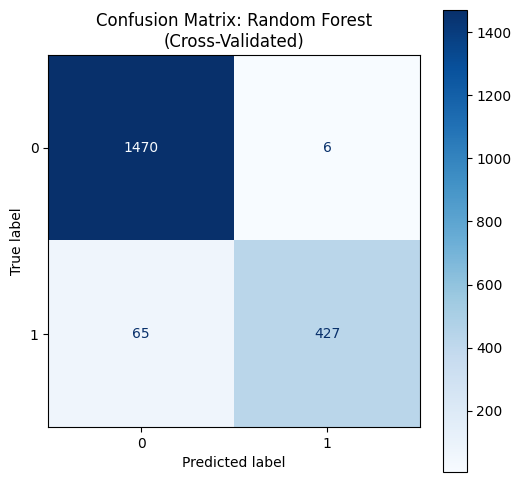

True Negatives (Legit correctly ID'd): 1470
False Positives (Legit mis-ID'd as Fraud): 6 <- Type I error
False Negatives (Fraud mis-ID'd as Legit): 65 <- Type II error (Critical for fraud!)
True Positives (Fraud correctly ID'd): 427
Recall for Fraud (Class 1): 0.8679
Precision for Fraud (Class 1): 0.9861

Analysis complete.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Configuration & Hyperparameters ---
# General
DATA_FILE_PATH = 'creditcard.csv' # Make sure this file is accessible
RANDOM_STATE = 42
CV_FOLDS = 5 # Number of folds for cross-validation

# Downsampling
MINORITY_CLASS_MIN_PERCENTAGE = 0.25 # Each class should be at least 25%

# Classifiers - Using simple default-ish parameters for demonstration
# More tuning would be needed for optimal performance
DT_PARAMS = {'max_depth': 5, 'random_state': RANDOM_STATE}
ADA_PARAMS = {
    'estimator': DecisionTreeClassifier(max_depth=1, random_state=RANDOM_STATE), # Decision stumps
    'n_estimators': 50,
    'learning_rate': 1.0,
    'random_state': RANDOM_STATE
}
RF_PARAMS = {'n_estimators': 100, 'max_depth': 10, 'random_state': RANDOM_STATE, 'n_jobs': -1}


def load_data(file_path):
    """Loads the credit card fraud dataset."""
    try:
        df = pd.read_csv(file_path)
        print(f"Data loaded successfully from {file_path}")
        print(f"Dataset shape: {df.shape}")
        return df
    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
        print("Please download it from https://www.kaggle.com/mlg-ulb/creditcardfraud and place it in the correct directory.")
        return None
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        return None

def part_a_imbalance_analysis(df):
    """Analyzes and prints class imbalance information."""
    print("\n--- Part (a): Class Imbalance Analysis ---")
    if 'Class' not in df.columns:
        print("Error: 'Class' column not found in the dataset.")
        return None
    
    class_counts = df['Class'].value_counts()
    fraudulent_count = class_counts.get(1, 0)
    legitimate_count = class_counts.get(0, 0)
    total_count = len(df)

    print(f"Total transactions: {total_count}")
    print(f"Legitimate transactions (Class 0): {legitimate_count} ({legitimate_count/total_count*100:.2f}%)")
    print(f"Fraudulent transactions (Class 1): {fraudulent_count} ({fraudulent_count/total_count*100:.2f}%)")

    if fraudulent_count == 0:
        print("Warning: No fraudulent transactions found. Cannot proceed with fraud detection modeling as is.")
        return None

    print("\nWhy class imbalance is problematic for classifiers:")
    print("1. Bias towards majority class: Models may achieve high accuracy by simply predicting the majority class, failing to detect the minority class (fraud).")
    print("2. Poor minority class performance: Standard algorithms aim to minimize overall error, which is dominated by the majority class. This leads to poor recall for the minority class.")
    print("3. Misleading evaluation metrics: Accuracy becomes a poor measure. Metrics like Precision, Recall, F1-score, and AUC-PR are more informative for imbalanced datasets.")
    return fraudulent_count, legitimate_count

def part_b_downsample_data(df, minority_count, majority_count):
    """Downsamples the majority class to balance the dataset."""
    print("\n--- Part (b): Downsampling Legitimate Transactions ---")
    
    df_majority = df[df['Class'] == 0]
    df_minority = df[df['Class'] == 1]

    # Calculate desired number of majority samples
    # We want minority_count / (minority_count + N_majority_new) >= MINORITY_CLASS_MIN_PERCENTAGE
    # N_majority_new <= minority_count * (1/MINORITY_CLASS_MIN_PERCENTAGE - 1)
    # For 25% (0.25), N_majority_new <= minority_count * (1/0.25 - 1) = minority_count * 3
    
    n_majority_new = int(minority_count * (1 / MINORITY_CLASS_MIN_PERCENTAGE - 1))
    n_majority_new = min(n_majority_new, majority_count) # Cannot sample more than available

    print(f"Original minority (fraudulent) samples: {minority_count}")
    print(f"Original majority (legitimate) samples: {majority_count}")
    print(f"Targeting new majority samples to be at most {n_majority_new} (to make minority at least {MINORITY_CLASS_MIN_PERCENTAGE*100}%).")

    df_majority_downsampled = resample(df_majority, 
                                       replace=False,    # sample without replacement
                                       n_samples=n_majority_new, # to match desired count
                                       random_state=RANDOM_STATE) # for reproducibility

    df_downsampled = pd.concat([df_majority_downsampled, df_minority])
    
    print(f"Downsampled dataset shape: {df_downsampled.shape}")
    new_fraud_percentage = (df_downsampled['Class'].sum() / len(df_downsampled)) * 100
    new_legit_percentage = 100 - new_fraud_percentage
    print(f"New class distribution: Legitimate: {new_legit_percentage:.2f}%, Fraudulent: {new_fraud_percentage:.2f}%")
    
    return df_downsampled

def preprocess_features(df):
    """Prepares features for modeling: scales 'Amount', drops 'Time'."""
    print("\n--- Preprocessing Features ---")
    df_processed = df.copy()

    if 'Time' in df_processed.columns:
        df_processed = df_processed.drop('Time', axis=1)
        print("'Time' column dropped.")
    
    if 'Amount' in df_processed.columns:
        scaler = StandardScaler()
        df_processed['Amount'] = scaler.fit_transform(df_processed['Amount'].values.reshape(-1, 1))
        print("'Amount' column scaled using StandardScaler.")
    else:
        print("Warning: 'Amount' column not found for scaling.")
        
    X = df_processed.drop('Class', axis=1)
    y = df_processed['Class']
    
    print(f"Features shape (X): {X.shape}")
    print(f"Target shape (y): {y.shape}")
    return X, y

def part_c_train_and_evaluate(X, y):
    """Trains and evaluates classifiers using cross-validation and confusion matrices."""
    print("\n--- Part (c): Training and Evaluating Classifiers ---")

    classifiers = {
        "Decision Tree": DecisionTreeClassifier(**DT_PARAMS),
        "Boosted Decision Stumps (AdaBoost)": AdaBoostClassifier(**ADA_PARAMS),
        "Random Forest": RandomForestClassifier(**RF_PARAMS)
    }

    # Stratified K-Folds for cross-validation to maintain class proportions in folds
    cv_strategy = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE)

    for name, clf in classifiers.items():
        print(f"\nEvaluating: {name}")
        print(f"Hyperparameters: {clf.get_params()}")

        # Get cross-validated predictions
        try:
            y_pred_cv = cross_val_predict(clf, X, y, cv=cv_strategy, n_jobs=-1)
        except Exception as e:
            print(f"Error during cross_val_predict for {name}: {e}")
            print("This might happen if the dataset is too small after downsampling for all folds to have both classes.")
            print("Consider reducing CV_FOLDS or checking data distribution.")
            continue
            
        # Compute confusion matrix
        cm = confusion_matrix(y, y_pred_cv)
        
        print(f"Confusion Matrix for {name} (from cross-validation):")
        print(cm)
        
        # Display confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        fig, ax = plt.subplots(figsize=(6,6))
        disp.plot(ax=ax, cmap=plt.cm.Blues)
        ax.set_title(f"Confusion Matrix: {name}\n(Cross-Validated)")
        plt.show()

        # Basic interpretation
        tn, fp, fn, tp = cm.ravel()
        print(f"True Negatives (Legit correctly ID'd): {tn}")
        print(f"False Positives (Legit mis-ID'd as Fraud): {fp} <- Type I error")
        print(f"False Negatives (Fraud mis-ID'd as Legit): {fn} <- Type II error (Critical for fraud!)")
        print(f"True Positives (Fraud correctly ID'd): {tp}")
        
        recall_fraud = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision_fraud = tp / (tp + fp) if (tp + fp) > 0 else 0
        print(f"Recall for Fraud (Class 1): {recall_fraud:.4f}")
        print(f"Precision for Fraud (Class 1): {precision_fraud:.4f}")


def main():
    """Main function to run the analysis."""
    df_original = load_data(DATA_FILE_PATH)
    if df_original is None:
        return

    analysis_result = part_a_imbalance_analysis(df_original)
    if analysis_result is None:
        return
    fraudulent_count, legitimate_count = analysis_result

    if fraudulent_count > 0:
        df_downsampled = part_b_downsample_data(df_original, fraudulent_count, legitimate_count)
        X, y = preprocess_features(df_downsampled)
        part_c_train_and_evaluate(X, y)
    else:
        print("Skipping downsampling and model training as no fraudulent transactions were found or an error occurred.")
    
    print("\nAnalysis complete.")

if __name__ == '__main__':
    main()